In [1]:
from __future__ import absolute_import, division, print_function

In [16]:

import tensorflow as tf
import numpy as np
import pandas as pd

rng = np.random

In [22]:
# Parameters.
learning_rate = 0.000001
training_steps = 10000
display_step = 50

In [23]:
# Training Data.
df=pd.read_csv('./linear_reg_exam_dataset.csv',usecols = [0,1],skiprows = [0],header=None)
d = df.values
data = np.float32(d)

dataset = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]})



Y = dataset['y'].values.tolist() # define the target variable (dependent variable) as y
X = dataset['x'].values.tolist()


In [24]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [25]:

# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [26]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 37.193291, W: 75.018303, b: -0.207481
step: 100, loss: 37.192348, W: 75.018303, b: -0.207177
step: 150, loss: 37.201679, W: 75.018303, b: -0.206872
step: 200, loss: 37.200729, W: 75.018303, b: -0.206567
step: 250, loss: 37.197868, W: 75.018303, b: -0.206262
step: 300, loss: 37.192211, W: 75.018303, b: -0.205958
step: 350, loss: 37.191154, W: 75.018303, b: -0.205653
step: 400, loss: 37.188828, W: 75.018303, b: -0.205348
step: 450, loss: 37.187111, W: 75.018295, b: -0.205043
step: 500, loss: 37.186165, W: 75.018295, b: -0.204739
step: 550, loss: 37.183731, W: 75.018295, b: -0.204434
step: 600, loss: 37.182785, W: 75.018295, b: -0.204129
step: 650, loss: 37.176594, W: 75.018295, b: -0.203825
step: 700, loss: 37.174267, W: 75.018295, b: -0.203520
step: 750, loss: 37.173210, W: 75.018295, b: -0.203215
step: 800, loss: 37.172844, W: 75.018295, b: -0.202910
step: 850, loss: 37.169983, W: 75.018295, b: -0.202606
step: 900, loss: 37.169041, W: 75.018295, b: -0.202301
step: 950, 

In [27]:
import matplotlib.pyplot as plt

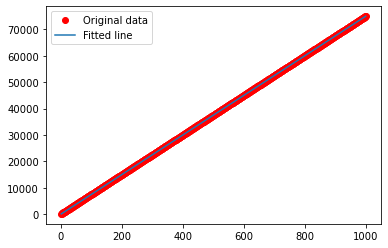

In [28]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()